# <a href="Index">Index</a>
## 1. [Loader Data Set](#LoaderDataSet)
## 2. [Model](#model)

### [Basic Model](#basicModel)
    
### [baseline](#baseline)

In [1]:
import torch
import numpy as np
from pathlib import Path
import torch.utils.data as data_utils
from torch.utils.data import DataLoader, Dataset
import torchvision
import torch.nn as nn
from torchvision import transforms
import os
import glob
import os.path as osp
import matplotlib.pyplot as plt
%matplotlib inline


import torch.nn as nn            # containing various building blocks for your neural networks
import torch.optim as optim      # implementing various optimization algorithms
import torch.nn.functional as F  # a lower level (compared to torch.nn) interface

# torchvision: popular datasets, model architectures, and common image transformations for computer vision.
import torchvision
# transforms: transformations useful for image processing
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader

import glob
import os.path as osp
import numpy as np
from PIL import Image

In [8]:
#path=os.getcwd()+'/training_data_numpy/'
path='../project_data/'

# <a href="LoaderDataSet"> 1. Loader Data set</a> 
[Back to Index](#Index)

In [9]:
class MammogramDataset(Dataset):
    def __init__(self):
        self.files_features=[]
        self.files_labels=[]
        self.transform=transforms.ToTensor()
        
        #Features
        
        feature_files=glob.glob(osp.join(path,'*count*.npz'))
        feature_files=sorted(feature_files)
        
        for f in feature_files:
                #num_imgs=int(f[f.index(' '):f.index('.')])
                num_imgs=int(f.split(" ")[1].split(".")[0])
                for i in range(num_imgs):
                    self.files_features.append(f[:f.index('.npz')]+'-'+str(i)+'.npz')
        
        self.len=len(self.files_features)
        
        
        #Labels
        
        labels_files=glob.glob(osp.join(path,'*class_arr.npz'))
        labels_files=sorted(labels_files)
        
        first_array=np.load(labels_files[0])
        training_labels=first_array['arr_0']
        
        for f in range(len(labels_files)-1):
            array= np.load(labels_files[f])
            training_labels=np.concatenate((training_labels,array['arr_0']),axis=0)
        
        self.training_labels=training_labels
        
    
    def __getitem__(self, index):
        """ Get a sample from the dataset
        """
        file=self.files_features[index]
        file_name=file[:file.index('-')]+'.npz'
        
        image_number=int(file.split("-")[1].split(".npz")[0])
        array_feature= np.load(file_name)
        selected_feature=array_feature['arr_0'][:,:,image_number]
        
        label=self.training_labels[index]
        
        
        return self.transform(selected_feature), label
    
    def __len__(self):
        return self.len

In [10]:
mam=MammogramDataset()

In [11]:
print(len(mam))

55885


label: 0


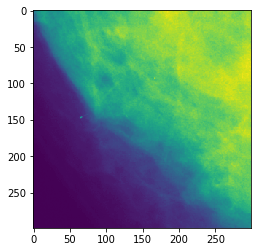

In [12]:
datapoint=mam[0]
image=datapoint[0]
label=datapoint[1]
print("label:", label)

plt.imshow(image[0].numpy())

In [23]:
trainset_loader = data_utils.DataLoader(mam, batch_size=16, shuffle = True)

In [27]:
batch = next(iter(trainset_loader))

In [28]:
images, labels = batch

In [29]:
labels

tensor([0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

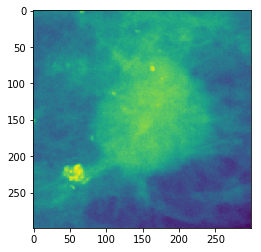

In [30]:
plt.imshow((images[0].squeeze()))

# <a href="model"> 2. Model </a>
[Back to Index](#Index)

In [12]:
images.squeeze().shape

torch.Size([16, 299, 299])

## <a href="simpleModel">2.1 Simple Model</a>

In [25]:
#dtype = torch.long
torch.set_default_dtype(torch.float64)
device = torch.device("cpu")

N, D_in, H, D_out = 4, 299*299, 100, 5


model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_iters=100


for t in range(num_iters):
    
    batch = next(iter(loader_dataset))
    images, labels=batch
    
    x=images.squeeze()
    x=x.reshape(x.shape[0],np.product(x.shape[1:]))
    #x=x.long()
    
    y=torch.nn.functional.one_hot(labels, D_out).double()
    #y=y.long()
    #print(labels)
    #print(x.shape)
    #print(y.shape)
    #print(y.max())
    #print(x.type())
    #print(y.type())
    #linear=torch.nn.Linear(D_in, H)
    #linear(x)
    y_pred=model(x)
    
    loss = criterion(y_pred, y)
    print(t, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()




0 39270.918893599155
1 32148762.106929306
2 5157288.81345386
3 5368676.160871639
4 2795747.7377194045
5 2562986.2250796496
6 4955163.019416174
7 1786275.1797248032
8 962727.3120329005
9 835340.0120287876
10 1028486.9309270681
11 1204930.2471176558
12 1012952.4793502634
13 867136.0374144256
14 444425.520788181
15 261861.62589686166
16 253663.81317606554
17 361714.00189124356
18 200986.27365132148
19 354974.44657645194
20 169970.91604219432
21 76230.15043153198
22 32374.747250376746
23 83646.95229452848
24 80998.44876961107
25 51790.45682238973
26 112072.76010401144
27 88228.55730722203
28 45516.45399846827
29 43538.832681225336
30 30059.47603959502
31 24318.257678246817
32 26876.512363302103
33 58861.53250162447
34 60250.9173006073
35 53105.476012551764
36 29640.949535724623
37 13754.153167051038
38 14615.013053356792
39 21963.71680013019
40 20615.986414791536


KeyboardInterrupt: 

# <a href="baseline">Baseline</a>
[Back to Index](#Index)

Use GPU if possible


In [15]:
torch.cuda.is_available()
torch.cuda.device(0)
torch.cuda.device_count()

1

In [31]:
t = torch.randn(2)
print("Initial device:\t'{}'".format(t.device))

Initial device:	'cpu'


In [32]:
t = t.to('cuda:0')
print("Move to gpu:\t'{}'".format(t.device))

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [3]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(123)
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


## Trying to replicate pytorch tutorial Procedure Define a Net

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0) tensor(0)


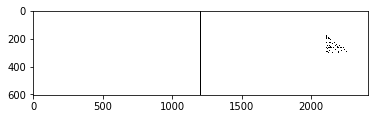

In [26]:
import matplotlib.pyplot as plt

# functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainset_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(16)))

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0,
        #        dilation=1, groups=1, bias=True, padding_mode='zeros')
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        
        # Linear(in_features, out_features, bias=True)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
        # MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
        self.max_pool = nn.MaxPool2d(2)
        # ReLU(inplace=False)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Note: the following two ways for max pooling / relu are equivalent.
        # 1) with torch.nn.functional:
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # 2) with torch.nn:
        x = self.relu(self.max_pool(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [34]:
from time import time
def train(epoch, log_interval=100):
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        start = time()
        for batch_idx, (data, target) in enumerate(loader_dataset):
            print(data.shape)
            print(target.shape)
            # bring data to the computing device, e.g. GPU
            data, target = data.to(device, dtype=torch.float), target.to(device, dtype=torch.float)
            
            # forward pass
            output = model(data)
            # compute loss: negative log-likelihood
            loss = F.nll_loss(output, target)
            
            # backward pass
            # clear the gradients of all tensors being optimized.
            optimizer.zero_grad()
            # accumulate (i.e. add) the gradients from this forward pass
            loss.backward()
            # performs a single optimization step (parameter update)
            optimizer.step()
            
            if iteration % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    ep, batch_idx * len(data), len(trainset_loader.dataset),
                    100. * batch_idx / len(trainset_loader), loss.item()))
            iteration += 1
            
        end = time()
        print('{:.2f}s'.format(end-start))
        test() # evaluate at the end of epoch

In [35]:
train(5)

torch.Size([16, 1, 299, 299])
torch.Size([16])


ValueError: Expected input batch_size (5041) to match target batch_size (16).